In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_48068/360642902.py:5: RuntimeWarning: divide by zero encountered in log2
  H_p1 = (- p1 * np.log2(p1)) - ((1-p1)*np.log2(1-p1))
/tmp/ipykernel_48068/360642902.py:5: RuntimeWarning: invalid value encountered in multiply
  H_p1 = (- p1 * np.log2(p1)) - ((1-p1)*np.log2(1-p1))


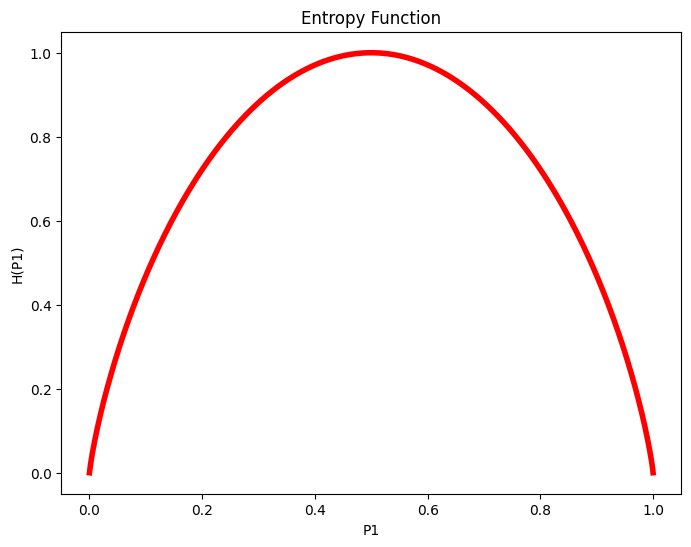

In [12]:
p1 = np.linspace(0, 1, 1000)

def compute_entropy(p1):
    
    H_p1 = (- p1 * np.log2(p1)) - ((1-p1)*np.log2(1-p1))
    for i in range(len(p1)):
        
        if p1[i] == 0 or p1[i] == 1:
            H_p1[i] = 0 
            
    return H_p1

H_p1 = compute_entropy(p1)

plt.figure(figsize=(8, 6))
plt.plot(p1, H_p1, color="red", linewidth=4)
plt.xlabel("P1")
plt.ylabel("H(P1)")
plt.title("Entropy Function")
plt.show()

In [8]:
"""
We will use one-hot encoding to encode the categorical features. They will be as follows:

    Ear Shape: Pointy = 1, Floppy = 0
    Face Shape: Round = 1, Not Round = 0
    Whiskers: Present = 1, Absent = 0

Therefore, we have two sets:

    X_train: for each example, contains 3 features:

          - Ear Shape (1 if pointy, 0 otherwise)
          - Face Shape (1 if round, 0 otherwise)
          - Whiskers (1 if present, 0 otherwise)

    y_train: whether the animal is a cat

          - 1 if the animal is a cat
          - 0 otherwise
"""

'\nWe will use one-hot encoding to encode the categorical features. They will be as follows:\n\n    Ear Shape: Pointy = 1, Floppy = 0\n    Face Shape: Round = 1, Not Round = 0\n    Whiskers: Present = 1, Absent = 0\n\nTherefore, we have two sets:\n\n    X_train: for each example, contains 3 features:\n\n          - Ear Shape (1 if pointy, 0 otherwise)\n          - Face Shape (1 if round, 0 otherwise)\n          - Whiskers (1 if present, 0 otherwise)\n\n    y_train: whether the animal is a cat\n\n          - 1 if the animal is a cat\n          - 0 otherwise\n'

In [16]:
X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

Y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])
print(X_train.shape)
print(Y_train.shape)

(10, 3)
(10,)


In [15]:
"""
On each node, we compute the information gain for each feature, 
then split the node on the feature with the higher information gain, 
by comparing the entropy of the node with the weighted entropy 
in the two splitted nodes. 
"""
print(compute_entropy(np.array([0.5])))

[1.]


In [23]:
def entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1- p)*np.log2(1 - p)

In [36]:
def split_indices(X, index):
    
    left_indx = []
    right_indx = []
    
    for i, x in enumerate(X):
        if x[index] == 1:
            left_indx.append(i)
        else:
            right_indx.append(i)
    return left_indx, right_indx

# optimized version
def split_indices1(X, index):
    
    left_indx = np.where(X[:, index] == 1)[0]
    right_indx = np.where(X[:, index] != 1)[0]
    
    return left_indx, right_indx


left_indx, right_indx = split_indices(X_train, 0)
left_indx1, right_indx1 = split_indices1(X_train, 0)  

print(left_indx1)
print(right_indx1)

[0 3 4 5 7]
[1 2 6 8 9]


In [32]:
def weighted_entropy(X, Y, left_indx, right_indx):
    
    W_left = len(left_indx) / len(X)
    W_right = len(right_indx) / len(X)
          
    P1_left = np.sum(Y[left_indx]) / len(left_indx)
    P1_right = np.sum(Y[right_indx]) / len(right_indx)
    
    weighted_entropy = (W_left * entropy(P1_left)) + (W_right * entropy(P1_right))
    
    return weighted_entropy

print(weighted_entropy(X_train, Y_train, left_indx, right_indx))
print(weighted_entropy(X_train, Y_train, left_indx1, right_indx1))           

0.7219280948873623
0.7219280948873623


In [34]:
def information_gain(X, Y, left_indx, right_indx):
    
    P_node = np.sum(Y) / len(Y)
    H_node = entropy(P_node)
    W_entropy = weighted_entropy(X, Y, left_indx, right_indx)
    
    info_gain = H_node - W_entropy
    
    return info_gain  

print(information_gain(X_train, Y_train, left_indx, right_indx))

0.2780719051126377


In [37]:
for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indx, right_indx = split_indices(X_train, i)
    info_gain = information_gain(X_train, Y_train, left_indx, right_indx)
    print(f"{feature_name}: {info_gain}")

Ear Shape: 0.2780719051126377
Face Shape: 0.034851554559677034
Whiskers: 0.12451124978365313


<h3>Decision Tree Algorithm</h3>

In [38]:

def compute_entropy(y):

    entropy = 0
    
    if len(y) == 0:
        return 0
    entropy = sum(y[y==1])/len(y)
    if entropy == 0 or entropy == 1:
        return 0
    else:
        return -entropy*np.log2(entropy) - (1-entropy)*np.log2(1-entropy)
     

def split_dataset(X, node_indices, feature):

    left_indices = []
    right_indices = []

    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
        
    return left_indices, right_indices   
    
    

def compute_information_gain(X, y, node_indices, feature):
    
    left_indices, right_indices = split_dataset(X, node_indices, feature)
    
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    
    information_gain = 0
    
    node_entropy = compute_entropy(y_node)
    left_entropy = compute_entropy(y_left)
    right_entropy = compute_entropy(y_right)
    w_left = len(X_left) / len(X_node)
    w_right = len(X_right) / len(X_node)
    weighted_entropy = w_left * left_entropy + w_right * right_entropy
    information_gain = node_entropy - weighted_entropy
    
    return information_gain

def get_best_split(X, y, node_indices):   
    num_features = X.shape[1]
    
    best_feature = -1

    max_info_gain = 0
    for feature in range(num_features):
        info_gain = compute_information_gain(X, y, node_indices, feature)
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = feature
        
   
    return best_feature


def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth, tree):

    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return
   

    best_feature = get_best_split(X, y, node_indices) 
    
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))
    

    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1, tree)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1, tree)
    return tree

In [39]:
tree = []
build_tree_recursive(
    X_train, Y_train, 
    [0,1,2,3,4,5,6,7,8,9], 
    "Root", max_depth=2, current_depth=0, 
    tree = tree)

print(tree)


 Depth 0, Root: Split on feature: 0
- Depth 1, Left: Split on feature: 1
  -- Left leaf node with indices [0, 4, 5, 7]
  -- Right leaf node with indices [3]
- Depth 1, Right: Split on feature: 2
  -- Left leaf node with indices [1]
  -- Right leaf node with indices [2, 6, 8, 9]
[([0, 3, 4, 5, 7], [1, 2, 6, 8, 9], 0), ([0, 4, 5, 7], [3], 1), ([1], [2, 6, 8, 9], 2)]
